### Problem Statement:
### Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

#### For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

#### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

#### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

#### Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### Libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Data Gathering:

In [4]:
train_data = pd.read_csv(r'D:\Datascience\Analytic Vidya Hackathon\Cross-sell Prediction\train.csv')
test_data = pd.read_csv(r'D:\Datascience\Analytic Vidya Hackathon\Cross-sell Prediction\test.csv')
sample_data = pd.read_csv(r'D:\Datascience\Analytic Vidya Hackathon\Cross-sell Prediction\sample_submission_iA3afxn.csv')

In [5]:
train_data.shape

(381109, 12)

In [6]:
test_data.shape

(127037, 11)

### Feature Engineering:

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [14]:
train_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [15]:
train_data.duplicated().sum()

0

In [16]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


### univariate analysis

<AxesSubplot:>

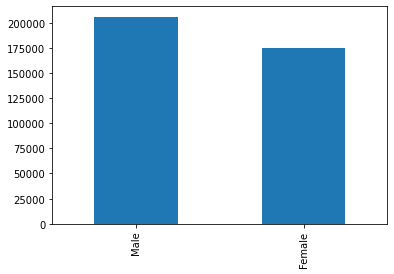

In [10]:
train_data['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

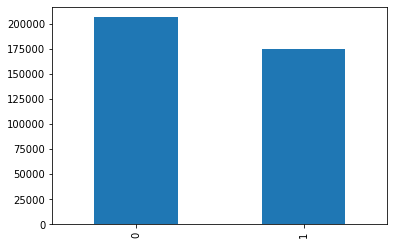

In [11]:
train_data['Previously_Insured'].value_counts().plot(kind='bar')

<AxesSubplot:>

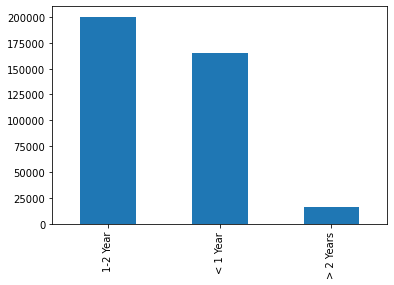

In [12]:
train_data['Vehicle_Age'].value_counts().plot(kind='bar')

### bivariate analysis

<AxesSubplot:xlabel='Response'>

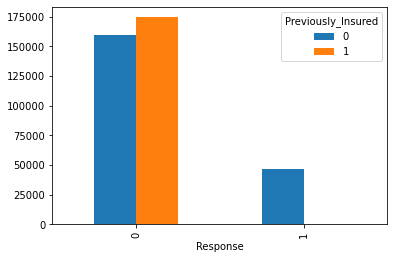

In [13]:
pd.crosstab(train_data['Response'],train_data['Previously_Insured']).plot(kind='bar')

<AxesSubplot:xlabel='Response'>

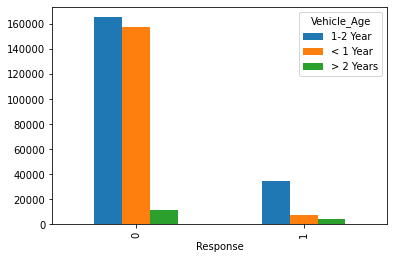

In [15]:
pd.crosstab(train_data['Response'],train_data['Vehicle_Age']).plot(kind='bar')

<AxesSubplot:xlabel='Response'>

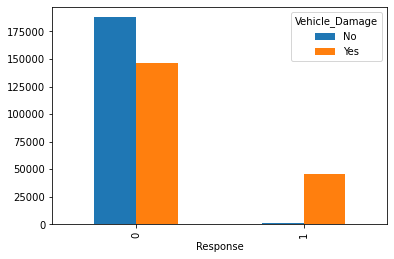

In [16]:
pd.crosstab(train_data['Response'],train_data['Vehicle_Damage']).plot(kind='bar')

In [17]:
all_data = pd.concat([train_data,test_data])

In [18]:
all_data.duplicated().sum()

0

In [19]:
all_data = pd.get_dummies(all_data,columns=['Gender','Vehicle_Age','Vehicle_Damage'])

In [20]:
all_data.head(10)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1.0,0,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0.0,0,1,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1.0,0,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0.0,0,1,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0.0,1,0,0,1,0,1,0
5,6,24,1,33.0,0,2630.0,160.0,176,0.0,1,0,0,1,0,0,1
6,7,23,1,11.0,0,23367.0,152.0,249,0.0,0,1,0,1,0,0,1
7,8,56,1,28.0,0,32031.0,26.0,72,1.0,1,0,1,0,0,0,1
8,9,24,1,3.0,1,27619.0,152.0,28,0.0,1,0,0,1,0,1,0
9,10,32,1,6.0,1,28771.0,152.0,80,0.0,1,0,0,1,0,1,0


In [21]:
pp_train = all_data[all_data['Response'].notna()]
pp_test = all_data[all_data['Response'].isna()]

### Feature Selection:

In [22]:
X = pp_train.drop(columns=['id','Response'])
y = pp_train['Response']

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((304887, 14), (76222, 14), (304887,), (76222,))

In [24]:
train_X.shape[0], test_X.shape[0], train_X.shape[0]+ test_X.shape[0], pp_train.shape[0]

(304887, 76222, 381109, 381109)

In [25]:
train_y.isna().sum()

0

### Model Selection:

### Boosting

In [26]:
def run_model(model,train_X = train_X, train_y = train_y,test_X = test_X,test_y=test_y ):
    print(model)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))

In [27]:
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]

In [28]:
for i in models:
    run_model(i)

LogisticRegression()
Train Accuracy :  0.876662501188965
Test Accuracy :  0.8739733935084358
KNeighborsClassifier()
Train Accuracy :  0.8860758248137834
Test Accuracy :  0.8565243630447902
DecisionTreeClassifier()
Train Accuracy :  0.9998852033704291
Test Accuracy :  0.8215738238303901
RandomForestClassifier()
Train Accuracy :  0.999872083755621
Test Accuracy :  0.8644879431135368
AdaBoostClassifier()
Train Accuracy :  0.8780302210327104
Test Accuracy :  0.8750623179659416


In [31]:
model = RandomForestClassifier()
model.fit(train_X,train_y)

RandomForestClassifier()

In [33]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.9998622440445148
f1 score 0.9994350586462929
confusion matrix
 [[267694      6]
 [    36  37151]]


In [34]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.8649340085539609
f1 score 0.18196265395311878
confusion matrix
 [[64782  1917]
 [ 8378  1145]]


In [39]:
modelDT = DecisionTreeClassifier()
modelDT.fit(train_X,train_y)

DecisionTreeClassifier()

 ### Model Deployment:

In [35]:
pptest_X = pp_test.drop(columns=['id','Response'])
y_unpred = model.predict(pptest_X)

In [36]:
np.unique(y_unpred, return_counts=True) 

(array([0., 1.]), array([121893,   5144], dtype=int64))

In [ ]:
pptest_X = pp_test.drop(columns=['id','Response'])
y_unpred_DT = modelDT.predict(pptest_X)

In [41]:
np.unique(y_unpred_DT, return_counts=True) 

(array([0., 1.]), array([110634,  16403], dtype=int64))

In [37]:
pp_test

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,381110,25,1,11.0,1,35786.0,152.0,53,NaN,0,1,0,1,0,1,0
1,381111,40,1,28.0,0,33762.0,7.0,111,NaN,0,1,1,0,0,0,1
2,381112,47,1,28.0,0,40050.0,124.0,199,NaN,0,1,1,0,0,0,1
3,381113,24,1,27.0,1,37356.0,152.0,187,NaN,0,1,0,1,0,0,1
4,381114,27,1,28.0,1,59097.0,152.0,297,NaN,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,30867.0,152.0,56,NaN,1,0,0,1,0,1,0
127033,508143,38,1,28.0,0,28700.0,122.0,165,NaN,1,0,1,0,0,0,1
127034,508144,21,1,46.0,1,29802.0,152.0,74,NaN,0,1,0,1,0,1,0
127035,508145,71,1,28.0,1,62875.0,26.0,265,NaN,0,1,1,0,0,1,0


In [42]:
#pp_test.to_csv('submission_crosssellprd.csv',index=False)

In [38]:
sample_data['Response']=y_unpred
sample_data['Response']=sample_data['Response']
sample_data.to_csv('submission_CrossSellprd_RF.csv',index=False)

In [42]:
sample_data['Response']=y_unpred_DT
sample_data['Response']=sample_data['Response']
sample_data.to_csv('submission_CrossSellprd_DT.csv',index=False)